In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/pranithagaddam/Downloads/ACME-HappinessSurvey2020.csv")

In [3]:
df.head(5)

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
df.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
df.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [6]:
#Split the features and target 
X=df.drop(columns='Y')
print(X.head(5))


   X1  X2  X3  X4  X5  X6
0   3   3   3   4   2   4
1   3   2   3   5   4   3
2   5   3   3   3   3   5
3   5   4   3   3   3   5
4   5   4   3   3   3   5


In [7]:
y=df['Y']

In [8]:
y.head(5)

0    0
1    0
2    1
3    0
4    0
Name: Y, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
#Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
from sklearn.linear_model import Ridge
model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_test, y_test)


-0.245336179527049

In [22]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_test, y_test,
                           n_repeats=30,
                           random_state=0)

In [24]:
for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{df.feature_names[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

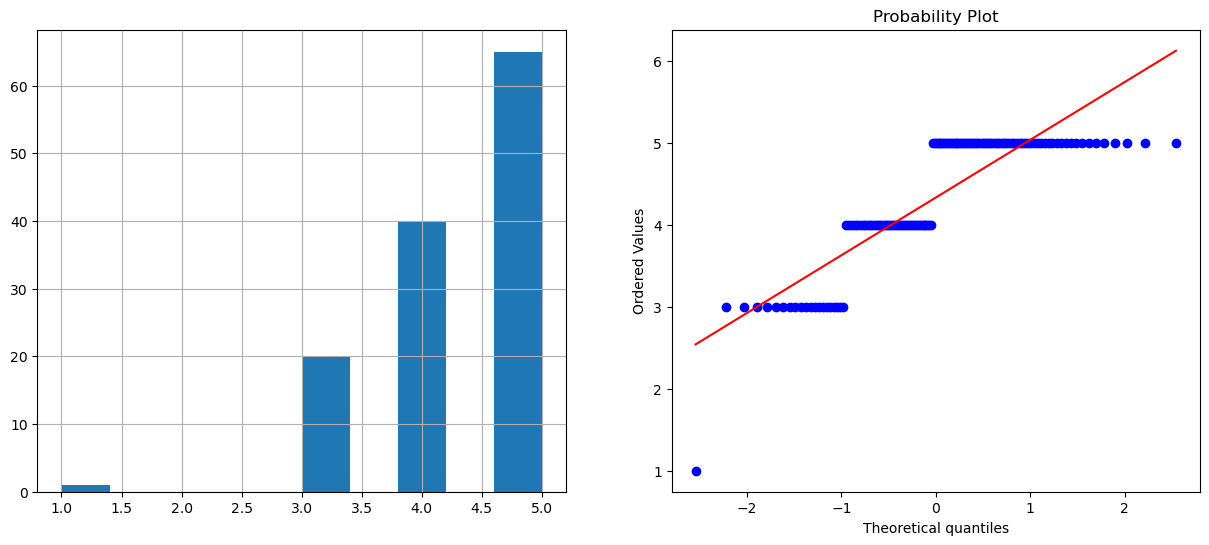

In [9]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab

def plots(y, X1):
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[X1].hist()
    plt.subplot(1, 2, 2)
    stats.probplot(df[X1], dist="norm", plot=pylab)
    plt.show()
plots(y, 'X1')